# Softmax - MNIST

En este notebook vamos a ver la implementación de Softmax en NumPy para clasificación multiclase. Vamos a aplicar el modelo al dataset de dígitos escritos a mano de la clase 2. 

## Cargamos las Librerías

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import itertools
import random
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, classification_report

RANDOM_STATE = 17

In [2]:
import sys  
sys.path.insert(0, '/content')

## Cargamos el Dataset

In [3]:
# Cargamos los datos

X, y = load_digits(return_X_y=True)
print('Formato del dataset: {}'.format(X.shape))

Formato del dataset: (1797, 64)


In [4]:
print('Formato de las etiquetas: {}'.format(y.shape))

Formato de las etiquetas: (1797,)


In [5]:
clases = np.unique(y)
print(clases)

[0 1 2 3 4 5 6 7 8 9]


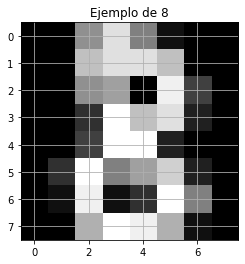

In [6]:
# Cargamos una muestra

plt.grid(True)
plt.title("Ejemplo de {}".format(y[8]))
plt.imshow(X[8, :].reshape((8, 8)), cmap='gray')

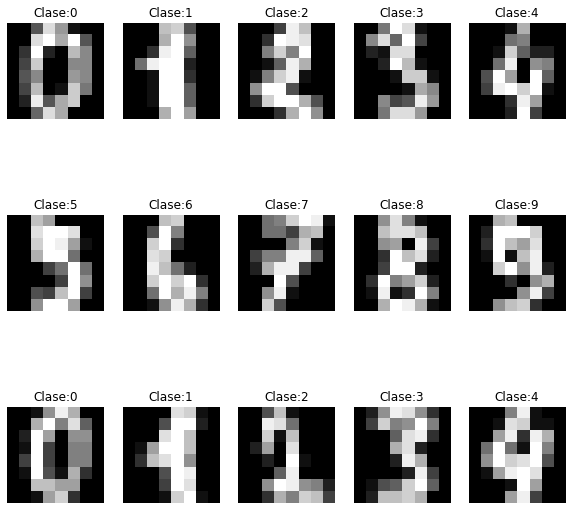

In [7]:
# Graficamos varias muestras

fig = plt.figure(figsize=(10, 10))
for i in range(15):  
    ax = fig.add_subplot(3, 5, i+1)
    ax.imshow(X[i].reshape(8, 8), cmap=plt.get_cmap('gray'))
    ax.set_title('Clase:{y}'.format(y=y[i]))
    plt.axis('off')

In [8]:
# Split del dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True)

In [9]:
X_train.shape

(1437, 64)

In [10]:
y_train.shape

(1437,)

## Creamos el Modelo

In [12]:
np.max(X_train)

16.0

In [13]:
# Escalamos las features

X_train_s = X_train / 16
X_test_s = X_test / 16

In [14]:
# Seleccionar hiperparámetros

lr = 0.01
batchSize = 10
epochs = 1000
alpha = 0.001
momentum = 0.05

In [15]:
clf = LogisticRegression()

model = clf.fit(X_train_s, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


### Predicciones y Matriz de Confusión

In [18]:
y_pred = model.predict(X_test_s)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       0.92      0.95      0.94        38
           2       0.98      1.00      0.99        43
           3       1.00      1.00      1.00        36
           4       1.00      0.94      0.97        35
           5       1.00      1.00      1.00        32
           6       0.98      0.98      0.98        49
           7       1.00      0.97      0.98        32
           8       0.92      0.92      0.92        36
           9       0.90      0.93      0.92        29

    accuracy                           0.97       360
   macro avg       0.97      0.97      0.97       360
weighted avg       0.97      0.97      0.97       360



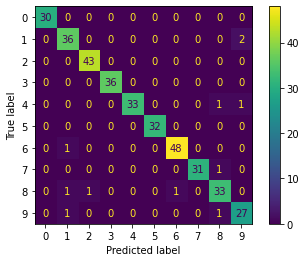

In [19]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
print(classification_report(y_test, y_pred))

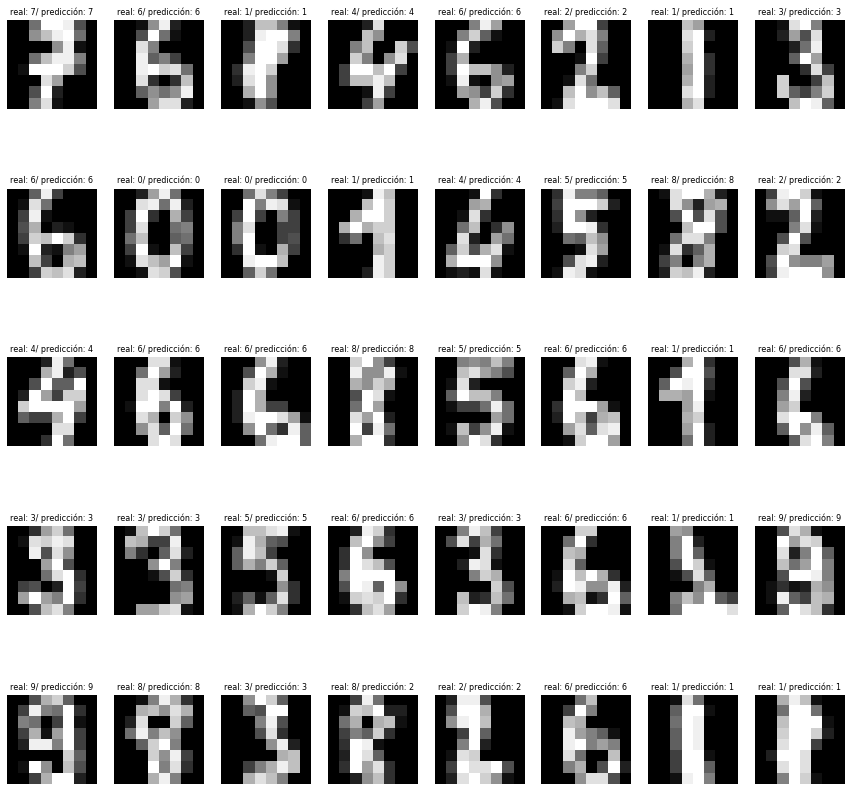

In [20]:
fig = plt.figure(figsize=(15,15))

for i in range(40):  
    ax = fig.add_subplot(5, 8, i+1)
    ax.imshow(X_test[i].reshape(8, 8), cmap=plt.get_cmap('gray'))    
    ax.set_title('real: {y}/ predicción: {y_hat}'.format(y=y_test[i], y_hat=y_pred[i]), fontsize=8)
    plt.axis('off')